In [1]:
'''importing the required libraries'''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
#plt.style.use('bmh')

In [2]:
# read all the data
ccba = pd.read_csv('public_train_x_ccba_full_hashed.csv') 
cdtx001 = pd.read_csv('public_train_x_cdtx0001_full_hashed.csv')
custinfo = pd.read_csv('public_train_x_custinfo_full_hashed.csv')
dp = pd.read_csv('public_train_x_dp_full_hashed.csv')
remit1 = pd.read_csv('public_train_x_remit1_full_hashed.csv')

public_alert_date = pd.read_csv('public_x_alert_date.csv')
train_alert_date = pd.read_csv('train_x_alert_date.csv')
y_answer = pd.read_csv('train_y_answer.csv')

In [23]:
ccba.head(20)

,cust_id,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,0,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,30,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,61,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,91,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,122,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,153,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,183,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,214,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,244,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,275,152628.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
cdtx001.head()

,cust_id,date,country,cur_type,amt
0,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,1,130,47,2312.0
1,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,808.0
2,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,7099.0
3,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,13,130,47,306.0
4,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,15,130,47,255.0


In [19]:
custinfo.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2
2,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7
3,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5
4,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5


In [20]:
dp.head()

,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
0,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,36,18,2,68265.0,1.0,16,NaN,NaN,0,0
1,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,42,17,2,932058.0,1.0,16,NaN,NaN,0,0
2,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,39,18,2,6089.0,1.0,16,NaN,NaN,0,0
3,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,49,15,2,776715.0,1.0,16,NaN,NaN,0,0
4,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,70,19,2,61630.0,1.0,16,NaN,NaN,0,0


In [21]:
remit1.head()

,cust_id,trans_date,trans_no,trade_amount_usd
0,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,148,0,100528.0
1,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,165,0,100528.0
2,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,231,0,89479.0
3,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,291,0,100528.0
4,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,389,0,30158.0


In [22]:
public_alert_date.head()

,alert_key,date
0,352342,365
1,352866,365
2,352696,365
3,352330,365
4,352683,365


In [3]:
# merge dp with y_answer using 'cust_id'
custinfo_data = pd.merge(custinfo, y_answer, on='alert_key', how='outer')
# merge custinfo_data with dp using 'cust_id'
custinfo_data_dp = pd.merge(custinfo_data, dp, on='cust_id', how='outer')

In [4]:
custinfo_data_dp.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,sar_flag,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,NaN,DB,98.0,10.0,2.0,5241.0,28.0350,20.0,NaN,NaN,0.0,1.0
1,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,NaN,CR,92.0,9.0,2.0,10481.0,27.9250,20.0,NaN,NaN,0.0,1.0
2,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,NaN,CR,110.0,2.0,2.0,4557.0,4.3245,16.0,NaN,NaN,0.0,0.0
3,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,NaN,DB,111.0,22.0,2.0,6289.0,28.0550,20.0,NaN,NaN,0.0,1.0
4,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,NaN,CR,77.0,18.0,2.0,10481.0,27.7750,20.0,NaN,NaN,0.0,1.0


In [5]:
custinfo_data_dp.drop(['alert_key', 'cust_id'], axis=1, inplace=True)

In [8]:
# turn 'debit_credit' into dummy variables
custinfo_data_dp = pd.get_dummies(custinfo_data_dp, columns=['debit_credit'])


In [13]:
# fill Nan values with 0
custinfo_data_dp.fillna(0, inplace=True)

In [14]:
custinfo_data_dp.head()

,risk_rank,occupation_code,total_asset,AGE,sar_flag,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,debit_credit_CR,debit_credit_DB
0,1,19.0,1465816.0,7,0.0,98.0,10.0,2.0,5241.0,28.0350,20.0,0.0,0.0,0.0,1.0,0,1
1,1,19.0,1465816.0,7,0.0,92.0,9.0,2.0,10481.0,27.9250,20.0,0.0,0.0,0.0,1.0,1,0
2,1,19.0,1465816.0,7,0.0,110.0,2.0,2.0,4557.0,4.3245,16.0,0.0,0.0,0.0,0.0,1,0
3,1,19.0,1465816.0,7,0.0,111.0,22.0,2.0,6289.0,28.0550,20.0,0.0,0.0,0.0,1.0,0,1
4,1,19.0,1465816.0,7,0.0,77.0,18.0,2.0,10481.0,27.7750,20.0,0.0,0.0,0.0,1.0,1,0


<AxesSubplot: title={'center': 'Correlation Matrix'}>

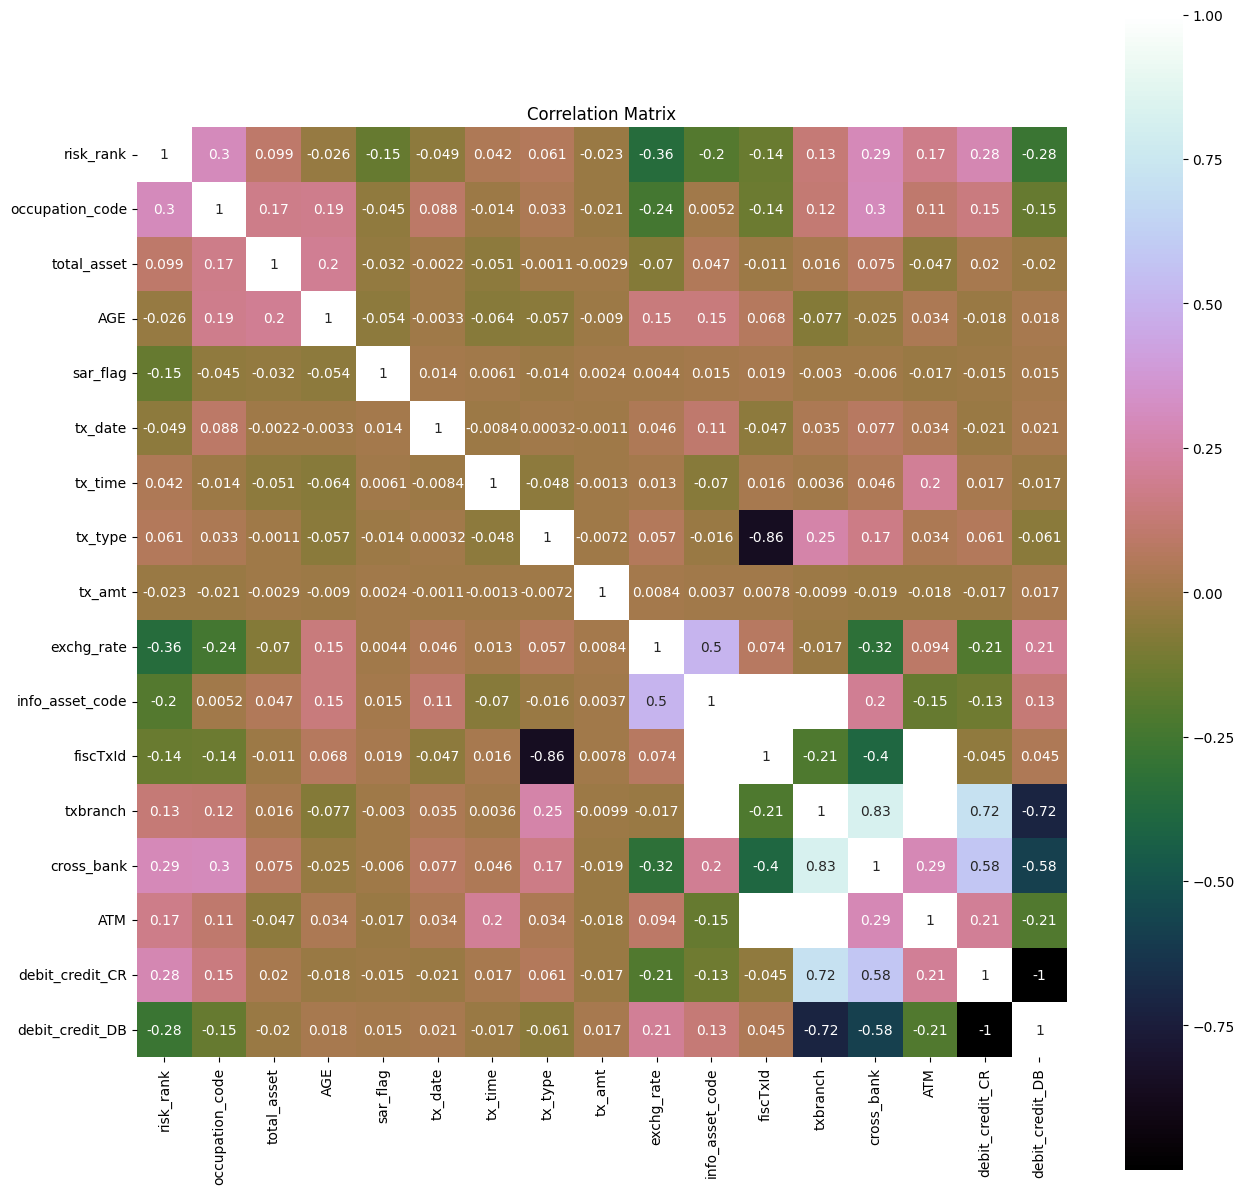

In [9]:
correlation = custinfo_data_dp.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

sar_flag跟所有東西都不太相關

In [15]:
# train test split
X = custinfo_data_dp.drop(['sar_flag'], axis=1)
y = custinfo_data_dp['sar_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)